# **Python Web Scraping for Data Analysis**

## **Project Outline**
• We're going to scrape https://www.forbes.com/lists/global2000/?sh=330928cf5ac0

• We'll get a list of companies. For each company, we'll get company name, country, sales, profit, assets and market value.

• We will create a CSV file in the given picture format

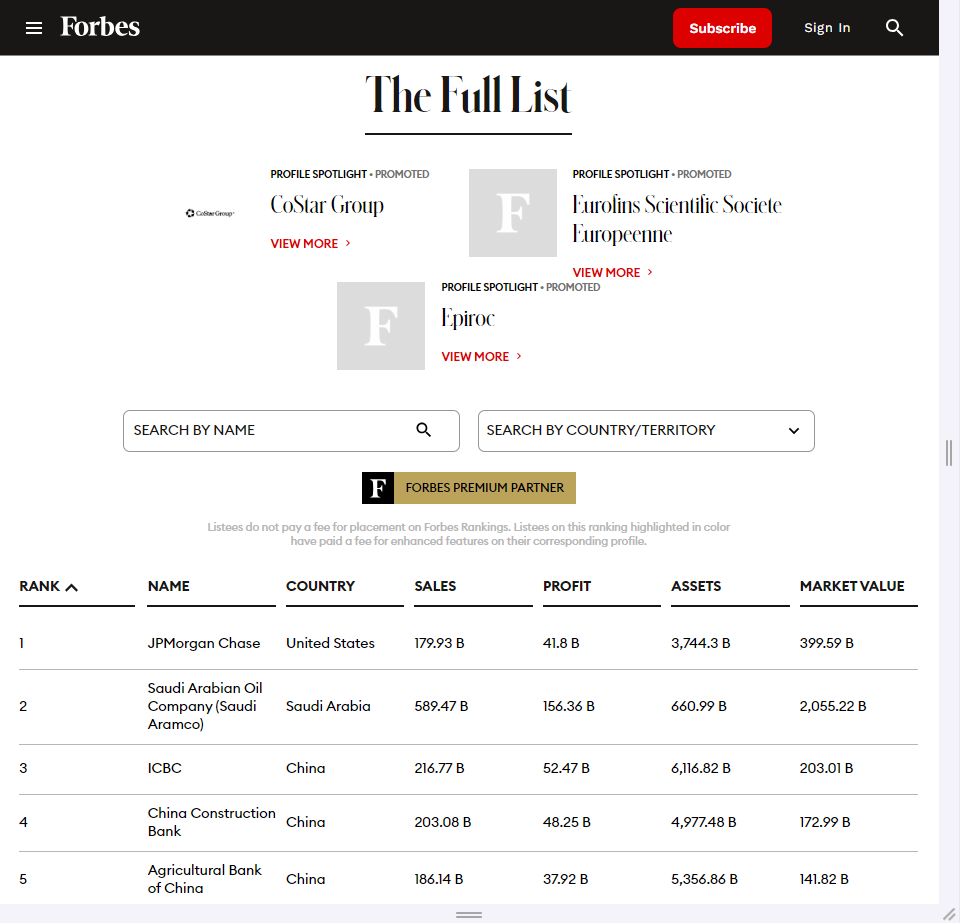

The 20th anniversary edition of the Global 2000 ranking offers a fascinating insight into the evolution of the world's largest companies over the past two decades. While stalwarts like Citigroup and General Electric once dominated the top spots, newer players like JPMorgan, Apple, and Alphabet now lead the pack. JPMorgan's ascent to the number one position reflects its resilience and strategic acquisitions, while Berkshire Hathaway's slip underscores the volatility of investment markets. The metrics used to compile the list - sales, profits, assets, and market value - reveal the staggering scale of these corporate behemoths, with total revenues surpassing $50 trillion for the first time. Despite slight declines in profits and market value, the diversity of countries represented, with the U.S. and China at the forefront, highlights the global nature of corporate power. This comprehensive ranking, based on the latest financial data available, provides invaluable insights into the dynamic landscape of global business.

### Using Request Library to download webpages from website

In [1]:

import pandas as pd
import requests
from bs4 import BeautifulSoup

In [86]:
#lets create a variable
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64)AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
url = 'https://www.forbes.com/lists/global2000/?sh=330928cf5ac0'

In [87]:
#lets check its response
response = requests.get(url, headers=headers, verify=True)
response

<Response [200]>

In [88]:
#lets check its length
len(response.text)

4283999

In [89]:
#lets check first 2000 length of response
web_page = response.text
web_page

'<!DOCTYPE html><html lang="en"><head><link rel="preload" as="font" href="https://i.forbesimg.com/assets/fonts/merriweather/merriweather-bold-webfont.woff2" type="font/woff2" crossorigin><link rel="preload" as="font" href="https://i.forbesimg.com/assets/fonts/work-sans/worksans-regular-webfont.woff2" type="font/woff2" crossorigin><link rel="preload" as="font" href="https://i.forbesimg.com/assets/fonts/merriweather/merriweather-regular-webfont.woff2" type="font/woff2" crossorigin><link rel="preload" as="font" href="https://i.forbesimg.com/assets/fonts/EuclidCircular/EuclidCircularB-Regular.otf" type="font/otf" crossorigin><link rel="preload" as="font" href="https://i.forbesimg.com/assets/fonts/Schnyder/SchnyderCondL-Bold.otf" type="font/otf" crossorigin><title>The Global 2000 2023</title><meta charset="utf-8"><meta http-equiv="Content-Language" content="en_US"><link rel="icon" href="https://i.forbesimg.com/48X48-F.png"><meta name="referrer" content="no-referrer-when-downgrade"><link rel

In [90]:
#lets extract the data from webpage using html.parser
b_soup = BeautifulSoup(web_page, 'html.parser')

In [100]:
print(b_soup.prettify()[:10000])

<!DOCTYPE html>
<html lang="en">
 <head>
  <link as="font" crossorigin="" href="https://i.forbesimg.com/assets/fonts/merriweather/merriweather-bold-webfont.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="https://i.forbesimg.com/assets/fonts/work-sans/worksans-regular-webfont.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="https://i.forbesimg.com/assets/fonts/merriweather/merriweather-regular-webfont.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="https://i.forbesimg.com/assets/fonts/EuclidCircular/EuclidCircularB-Regular.otf" rel="preload" type="font/otf"/>
  <link as="font" crossorigin="" href="https://i.forbesimg.com/assets/fonts/Schnyder/SchnyderCondL-Bold.otf" rel="preload" type="font/otf"/>
  <title>
   The Global 2000 2023
  </title>
  <meta charset="utf-8"/>
  <meta content="en_US" http-equiv="Content-Language"/>
  <link href="https://i.forbesimg.com/48X48-F.png" rel="icon"/>
  <meta 

By analyzing the web structure I came to know that

## **Companies**


By inspecting the webpage I came to know that name of the companies are inside "div" and under "class = organizationName". I have used `find()` function to extract company names from a webpage. By specifying the HTML tag `<div>`, the function searches the webpage for all occurrences of this tag and returns them as a list. Each `<div>` tag encapsulates a company name, which is extracted as the inner text of the tag.

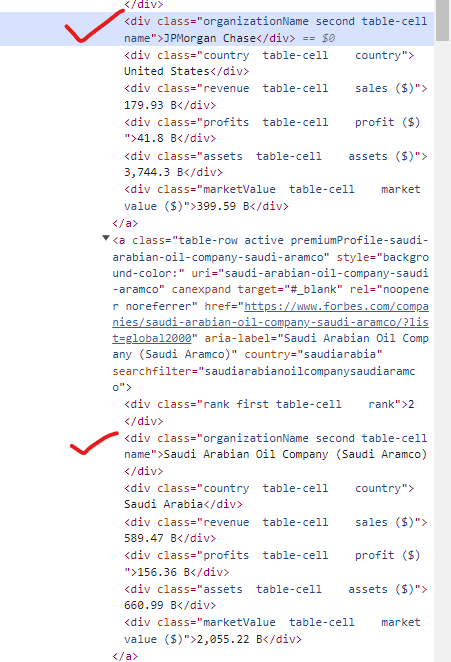

In [180]:
#let see what is store in the class_="organizationName"
company_name = b_soup.find('div', class_="organizationName")
company_name

<div class="organizationName second table-cell name">JPMorgan Chase</div>

In [146]:
#lets check that
'''
find_all function is used to extract everything under that class name
'''
total_company = b_soup.find_all('div', class_="organizationName")
total_company

[<div class="organizationName second table-cell name">JPMorgan Chase</div>,
 <div class="organizationName second table-cell name">Saudi Arabian Oil Company (Saudi Aramco)</div>,
 <div class="organizationName second table-cell name">ICBC</div>,
 <div class="organizationName second table-cell name">China Construction Bank</div>,
 <div class="organizationName second table-cell name">Agricultural Bank of China</div>,
 <div class="organizationName second table-cell name">Bank of America</div>,
 <div class="organizationName second table-cell name">Alphabet</div>,
 <div class="organizationName second table-cell name">ExxonMobil</div>,
 <div class="organizationName second table-cell name">Microsoft</div>,
 <div class="organizationName second table-cell name">Apple</div>,
 <div class="organizationName second table-cell name">Shell</div>,
 <div class="organizationName second table-cell name">Bank of China</div>,
 <div class="organizationName second table-cell name">Toyota Motor</div>,
 <div clas

Here we extracted all the companies name. Lets check the number of companies we have extracted

In [109]:
#checking number of companies
len(total_company)

2000

We have extracted 2000 companies from the Forbes. But we can see those data are still in html format lets clean it. For that we can use beautifulsoup inbuilt functon i.e. "text".

In [132]:
first_company = b_soup.find('div', class_="organizationName").text.strip() ##strip removes the formating from the output
first_company

'JPMorgan Chase'

In [206]:
#creating empty lists for company
company = []

In [207]:
#lets extract the name of the company
for i in total_company:
  company.append(i.text.strip())

In [208]:
#lets see whats in our list
company

['JPMorgan Chase',
 'Saudi Arabian Oil Company (Saudi Aramco)',
 'ICBC',
 'China Construction Bank',
 'Agricultural Bank of China',
 'Bank of America',
 'Alphabet',
 'ExxonMobil',
 'Microsoft',
 'Apple',
 'Shell',
 'Bank of China',
 'Toyota Motor',
 'Samsung Electronics',
 'UnitedHealth Group',
 'Ping An Insurance Group',
 'Wells Fargo',
 'Chevron',
 'PetroChina',
 'HSBC Holdings',
 'TotalEnergies',
 'Verizon Communications',
 'Walmart',
 'Citigroup',
 'China Mobile',
 'China Merchants Bank',
 'Postal Savings Bank Of China (PSBC)',
 'BP',
 'Volkswagen Group',
 'Morgan Stanley',
 'Meta Platforms',
 'Sinopec',
 'BNP Paribas',
 'Goldman Sachs Group',
 'Tencent Holdings',
 'Amazon',
 'Allianz',
 'RBC',
 'Pfizer',
 'Johnson & Johnson',
 'Deutsche Telekom',
 'Mercedes-Benz Group',
 'TD Bank Group',
 'Taiwan Semiconductor',
 'Reliance Industries',
 'BMW Group',
 'LVMH Moët Hennessy Louis Vuitton',
 'AXA Group',
 'Santander',
 'Nestlé',
 'Comcast',
 'Equinor',
 'Bank of Communications',
 'Alib

In [209]:
len(company)

2000

In [210]:
#lets convert our list into the pandas dataframe
df = pd.DataFrame(company)
df

0
0                               JPMorgan Chase
1     Saudi Arabian Oil Company (Saudi Aramco)
2                                         ICBC
3                      China Construction Bank
4                   Agricultural Bank of China
...                                        ...
1995                                Alfa Laval
1996                                       Gap
1997                                  Yes Bank
1998                                 BEKB-BCBE
1999                                     Ipsen

[2000 rows x 1 columns]

## **Country**
Lets analyze the web structure to find out the countries those companies belong.

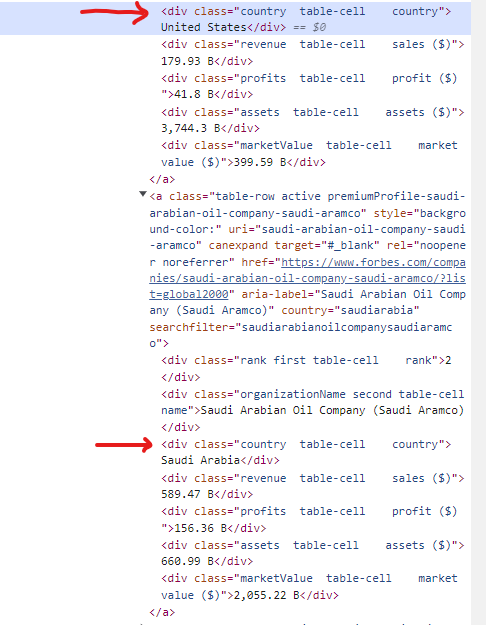

Countries for respective companies comes under the class country

In [211]:
#lets extract the country
country_name = b_soup.find('div', class_='country')
country_name.text.strip()

'United States'

In [212]:
#lets findout all the countries name to do that we will use find_all
country_name = b_soup.find_all('div', class_='country')
country_name

[<div class="country table-cell country">United States</div>,
 <div class="country table-cell country">Saudi Arabia</div>,
 <div class="country table-cell country">China</div>,
 <div class="country table-cell country">China</div>,
 <div class="country table-cell country">China</div>,
 <div class="country table-cell country">United States</div>,
 <div class="country table-cell country">United States</div>,
 <div class="country table-cell country">United States</div>,
 <div class="country table-cell country">United States</div>,
 <div class="country table-cell country">United States</div>,
 <div class="country table-cell country">United Kingdom</div>,
 <div class="country table-cell country">China</div>,
 <div class="country table-cell country">Japan</div>,
 <div class="country table-cell country">South Korea</div>,
 <div class="country table-cell country">United States</div>,
 <div class="country table-cell country">China</div>,
 <div class="country table-cell country">United States</di

In [213]:
#creating empty list for country
country = []

In [214]:
#extrating all countries and appending into the list
for i in country_name:
  country.append(i.text.strip())

In [215]:
#lets print the length of list
len(country)

2000

In [216]:
country

['United States',
 'Saudi Arabia',
 'China',
 'China',
 'China',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United Kingdom',
 'China',
 'Japan',
 'South Korea',
 'United States',
 'China',
 'United States',
 'United States',
 'China',
 'United Kingdom',
 'France',
 'United States',
 'United States',
 'United States',
 'Hong Kong',
 'China',
 'China',
 'United Kingdom',
 'Germany',
 'United States',
 'United States',
 'China',
 'France',
 'United States',
 'China',
 'United States',
 'Germany',
 'Canada',
 'United States',
 'United States',
 'Germany',
 'Germany',
 'Canada',
 'Taiwan',
 'India',
 'Germany',
 'France',
 'France',
 'Spain',
 'Switzerland',
 'United States',
 'Norway',
 'China',
 'China',
 'United States',
 'Japan',
 'Japan',
 'Brazil',
 'Switzerland',
 'China',
 'Netherlands',
 'China',
 'United States',
 'United States',
 'United States',
 'China',
 'United States',
 'United States',
 'United States',
 'United States',
 'H

We have extracted all the countries name and by analyzing the website there are all together 6 columns. We have extracted data of companies and countries.

Remaining columns and their classes are:
1. Sales (class = revenue)
2. Profit (class = profits)
3. Assets (class = assets)
4. Market Value (class = marketValue)


In [217]:
#extracting all the sales data
sales_data = b_soup.find_all('div', class_='revenue')
sales_data

[<div class="revenue table-cell sales ($)">179.93 B</div>,
 <div class="revenue table-cell sales ($)">589.47 B</div>,
 <div class="revenue table-cell sales ($)">216.77 B</div>,
 <div class="revenue table-cell sales ($)">203.08 B</div>,
 <div class="revenue table-cell sales ($)">186.14 B</div>,
 <div class="revenue table-cell sales ($)">133.84 B</div>,
 <div class="revenue table-cell sales ($)">282.85 B</div>,
 <div class="revenue table-cell sales ($)">393.16 B</div>,
 <div class="revenue table-cell sales ($)">207.59 B</div>,
 <div class="revenue table-cell sales ($)">385.1 B</div>,
 <div class="revenue table-cell sales ($)">365.89 B</div>,
 <div class="revenue table-cell sales ($)">158.23 B</div>,
 <div class="revenue table-cell sales ($)">270.49 B</div>,
 <div class="revenue table-cell sales ($)">220.07 B</div>,
 <div class="revenue table-cell sales ($)">335.94 B</div>,
 <div class="revenue table-cell sales ($)">166.37 B</div>,
 <div class="revenue table-cell sales ($)">108.93 B</div>

In [218]:
#extracting all the profit data
profit_data = b_soup.find_all('div', class_='profits')
profit_data

[<div class="profits table-cell profit ($)">41.8 B</div>,
 <div class="profits table-cell profit ($)">156.36 B</div>,
 <div class="profits table-cell profit ($)">52.47 B</div>,
 <div class="profits table-cell profit ($)">48.25 B</div>,
 <div class="profits table-cell profit ($)">37.92 B</div>,
 <div class="profits table-cell profit ($)">28.62 B</div>,
 <div class="profits table-cell profit ($)">58.59 B</div>,
 <div class="profits table-cell profit ($)">61.69 B</div>,
 <div class="profits table-cell profit ($)">69.02 B</div>,
 <div class="profits table-cell profit ($)">94.32 B</div>,
 <div class="profits table-cell profit ($)">43.51 B</div>,
 <div class="profits table-cell profit ($)">33.23 B</div>,
 <div class="profits table-cell profit ($)">18.5 B</div>,
 <div class="profits table-cell profit ($)">34.49 B</div>,
 <div class="profits table-cell profit ($)">20.7 B</div>,
 <div class="profits table-cell profit ($)">12.64 B</div>,
 <div class="profits table-cell profit ($)">14.5 B</div>,


In [219]:
#extracting all the assets data
assets_data = b_soup.find_all('div', class_='assets')
assets_data

[<div class="assets table-cell assets ($)">3,744.3 B</div>,
 <div class="assets table-cell assets ($)">660.99 B</div>,
 <div class="assets table-cell assets ($)">6,116.82 B</div>,
 <div class="assets table-cell assets ($)">4,977.48 B</div>,
 <div class="assets table-cell assets ($)">5,356.86 B</div>,
 <div class="assets table-cell assets ($)">3,194.66 B</div>,
 <div class="assets table-cell assets ($)">369.49 B</div>,
 <div class="assets table-cell assets ($)">369.37 B</div>,
 <div class="assets table-cell assets ($)">380.09 B</div>,
 <div class="assets table-cell assets ($)">332.16 B</div>,
 <div class="assets table-cell assets ($)">429.15 B</div>,
 <div class="assets table-cell assets ($)">4,421.76 B</div>,
 <div class="assets table-cell assets ($)">542.5 B</div>,
 <div class="assets table-cell assets ($)">348.81 B</div>,
 <div class="assets table-cell assets ($)">283.68 B</div>,
 <div class="assets table-cell assets ($)">1,598.49 B</div>,
 <div class="assets table-cell assets ($)">1

In [220]:
#extracting market value data
marketValue_data = b_soup.find_all('div', class_='marketValue')
marketValue_data

[<div class="marketValue table-cell market value ($)">399.59 B</div>,
 <div class="marketValue table-cell market value ($)">2,055.22 B</div>,
 <div class="marketValue table-cell market value ($)">203.01 B</div>,
 <div class="marketValue table-cell market value ($)">172.99 B</div>,
 <div class="marketValue table-cell market value ($)">141.82 B</div>,
 <div class="marketValue table-cell market value ($)">220.82 B</div>,
 <div class="marketValue table-cell market value ($)">1,340.53 B</div>,
 <div class="marketValue table-cell market value ($)">439.39 B</div>,
 <div class="marketValue table-cell market value ($)">2,309.84 B</div>,
 <div class="marketValue table-cell market value ($)">2,746.21 B</div>,
 <div class="marketValue table-cell market value ($)">205.45 B</div>,
 <div class="marketValue table-cell market value ($)">122.67 B</div>,
 <div class="marketValue table-cell market value ($)">188.2 B</div>,
 <div class="marketValue table-cell canExpand market value ($)">334.31 B</div>,
 <d

In [221]:
#creating empty list for remaining 4 columns
sales = []
profit = []
assets = []
market_value = []

In [222]:
#lets extract all the data using for loop
for i, j, k, l in zip(sales_data, profit_data, assets_data, marketValue_data):
  sales.append(i.text.strip())
  profit.append(j.text.strip())
  assets.append(k.text.strip())
  market_value.append(l.text.strip())

In [223]:
#lets check the lenth of all the list (should be 2000)
len(sales), len(profit), len(assets), len(market_value)

(2000, 2000, 2000, 2000)

## **Pandas Dataframe**

In [227]:
#lets combine list into dictionary
data = {'Company Name': company,
        'Country': country,
        'Sales': sales,
        'Profit': profit,
        'Assets': assets,
        'Market Value': market_value}

In [228]:
#lets create a dataframe from the dictionary
df = pd.DataFrame(data)
df

Company Name        Country     Sales  \
0                               JPMorgan Chase  United States  179.93 B   
1     Saudi Arabian Oil Company (Saudi Aramco)   Saudi Arabia  589.47 B   
2                                         ICBC          China  216.77 B   
3                      China Construction Bank          China  203.08 B   
4                   Agricultural Bank of China          China  186.14 B   
...                                        ...            ...       ...   
1995                                Alfa Laval         Sweden    5.35 B   
1996                                       Gap  United States   15.62 B   
1997                                  Yes Bank          India    3.34 B   
1998                                 BEKB-BCBE    Switzerland     556 M   
1999                                     Ipsen         France    3.18 B   

        Profit      Assets Market Value  
0       41.8 B   3,744.3 B     399.59 B  
1     156.36 B    660.99 B   2,055.22 B  
2      52.47 B  6,116.82 B     203.01 B  
3      48.25 B  4,977.48 B     172.99 B  
4      37.92 B  5,356.86 B     141.82 B  
...        ...         ...          ...  
1995   489.5 M      7.82 B       15.6 B  
1996    -202 M     11.39 B       3.17 B  
1997    91.6 M     43.22 B        5.6 B  
1998   167.1 M     42.97 B       2.49 B  
1999   681.7 M      5.99 B      10.21 B  

[2000 rows x 6 columns]

In [229]:
#lets convert our dataframe into csv file
file = 'company_stat.csv'

# Convert the DataFrame to a CSV file
df.to_csv(file, index=False)

## **Conclusion**

Utilizing Python web scraping techniques, I meticulously extracted data from the esteemed Forbes Global 2000 list, providing invaluable insights into the world's largest companies. Employing BeautifulSoup and requests libraries, I navigated through the intricacies of Forbes' website structure, capturing essential metrics such as sales, profits, assets, and market value. By meticulously parsing HTML elements and applying efficient data extraction strategies, I compiled a comprehensive dataset reflecting the financial prowess and global influence of these corporate giants. This endeavor enabled me to delve deep into the dynamic landscape of corporate rankings, fostering a deeper understanding of the evolving business ecosystem.